# Introdução
O suicídio é um problema global de saúde pública que afeta pessoas de todas as idades, gêneros, etnias e classes sociais. A análise de dados relacionados ao suicídio pode fornecer informações importantes sobre os fatores de risco e as tendências que podem ser usadas para desenvolver intervenções eficazes de prevenção. Nesse sentido, a clusterização de dados de suicídio pode ser uma ferramenta útil para agrupar os dados em grupos com características semelhantes, permitindo uma análise mais aprofundada de cada grupo. Este projeto tem como objetivo aplicar técnicas de clusterização em dados de suicídio para identificar padrões e tendências nos dados e fornecer informações valiosas para prevenção do suicídio.

## Dicionário dos Dados
Título | Descrição | Tipo
----|----|---
estado | Estado de registro | str
ano    | Ano de registro    | int
mes    | Mês                | int
DTOBITO|Data do óbito em formato YYYY-MM-DD | str
DTNASC |Data de nascimento em formato YYYY-MM-DD | str
SEXO   |Sexo registrado     | str
RACACOR|Raça/cor de acordo com a classificação do IBGE | str
ASSISTMED|Recebeu assistência médica? (Sim ou não)|str
ESCMAE | Escolaridade registrada da mãe | str
ESTCIV |Estado civil        | str
ESC    |Escolaridade (em anos)|str
OCUP   |Ocupação             | str
CODMUNRES|Cidade             | str
CAUSABAS|Causa básica da morte (de acordo com CID) | str
CAUSABAS_O|Causa básica da morte (de acordo com CID)|str
LOCOCOR|Local de ocorrência da morte|str
CIRURGIA|Foi realizada cirurgia? (Sim ou não)|str


## Importações

In [45]:
#Bibliotecas de manipulação de visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Biblioteca para pré-processamento de dados
from sklearn.model_selection import train_test_split

#Biblioteca para análise do modelo
from sklearn.metrics import silhouette_score

Primeiro vamos carregar os dados e colocá-los na variável "df" e depois análisa-los utilizando a função .info()

In [46]:
df = pd.read_csv('suicidios_2010_a_2019.csv', index_col=0)
df.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6436\4014347610.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('suicidios_2010_a_2019.csv', index_col=0)


,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESCMAE,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,CIRURGIA
1,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,Não
2,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
3,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
4,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,NaN,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,Não
5,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,NaN,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio,Não


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112491 entries, 1 to 112491
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   estado      112491 non-null  object
 1   ano         112491 non-null  int64 
 2   mes         112491 non-null  int64 
 3   DTOBITO     112491 non-null  object
 4   DTNASC      101633 non-null  object
 5   SEXO        112469 non-null  object
 6   RACACOR     109320 non-null  object
 7   ASSISTMED   70687 non-null   object
 8   ESCMAE      15 non-null      object
 9   ESTCIV      103791 non-null  object
 10  ESC         84327 non-null   object
 11  OCUP        60274 non-null   object
 12  CODMUNRES   112491 non-null  object
 13  CAUSABAS    112491 non-null  object
 14  CAUSABAS_O  112204 non-null  object
 15  LOCOCOR     112031 non-null  object
 16  CIRURGIA    8549 non-null    object
dtypes: int64(2), object(15)
memory usage: 15.4+ MB


Agora vamos, tratar os dados faltantes da variável 'DTNASC', para conseguirmos pegar o seu ano e assim, calcular a idade

In [49]:
df['DTNASC'].isna().sum()

10858

In [50]:
df['DTNASC'].fillna(0, inplace=True)

In [51]:
df['DTNASC'].isna().sum()

0

Vamos pegar o ano de nascimento e o ano de óbito, e calcular a idade.

In [52]:
def pega_ano(ano):
    lista = str(ano).split('-')
    return int(lista[0])

In [53]:
for value in str(df['DTNASC'].iloc[:]):
    value.split('-')

In [54]:
ano_nascimento = df['DTNASC'].apply(pega_ano)
ano_obito = df['DTOBITO'].apply(pega_ano)
idade = ano_obito - ano_nascimento
df['Idade'] = idade

In [55]:
df['Idade'].value_counts()

 30      2283
 31      2245
 29      2214
 33      2205
 28      2169
         ... 
-2176       1
-4189       1
-2177       1
 113        1
 1825       1
Name: Idade, Length: 257, dtype: int64

In [95]:
def troca_idade(idade):
    if idade < 0 or idade > 100:
        idade = round(df['Idade'].mean())
        return(idade)
    else:
        return(idade)
    


In [96]:
df['Idade'] = df['Idade'].apply(troca_idade)

Agora vamos analisar a distribuição dos dados. Essa análise pode ajudar a identificar padrões e tendências nos dados, bem como outliers e possíveis erros de medição. No contexto específico da análise de dados de suicídio, a distribuição dos dados pode fornecer informações importantes sobre as características da população estudada e os fatores de risco associados ao suicídio em diferentes regiões geográficas. Por exemplo, ao analisar a distribuição dos dados de suicídio por idade, pode-se identificar se há uma faixa etária mais suscetível ao suicídio. Além disso, a análise da distribuição dos dados pode ajudar a definir o tipo de modelo de clusterização que será mais apropriado para a análise dos dados, permitindo uma análise mais precisa e detalhada dos subgrupos identificados.

Text(0.5, 0.98, 'Número de Suicídio por Estado')

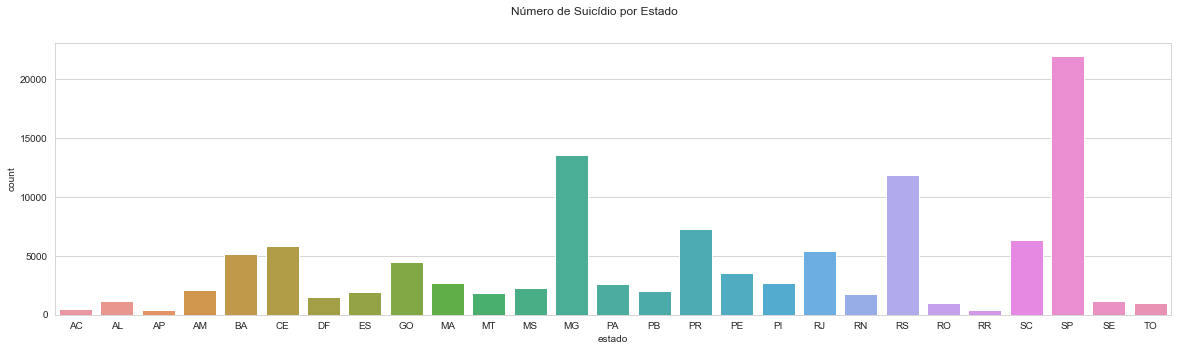

In [101]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
sns.countplot(x='estado', data=df)
plt.suptitle('Número de Suicídio por Estado')

Os estados de São Paulo e Minas Gerais estão com os maiores números de suícido, estando o estado de São Paulo bem acima dos demais estados. Essas dois estados são os mais populados do país, isso revela uma situação preocupante em relação à saúde mental da população dessa região. Esses dados podem ter várias causas, como a falta de acesso a serviços de saúde mental, altos níveis de estresse na vida urbana ou falta de conscientização sobre a importância da saúde mental. Além disso, é importante destacar que os dados de suicídio são subnotificados em muitos casos, o que pode indicar que o problema é ainda mais grave do que os números sugerem.

Text(0.5, 0.98, 'Número de Suicídios 2010-2019')

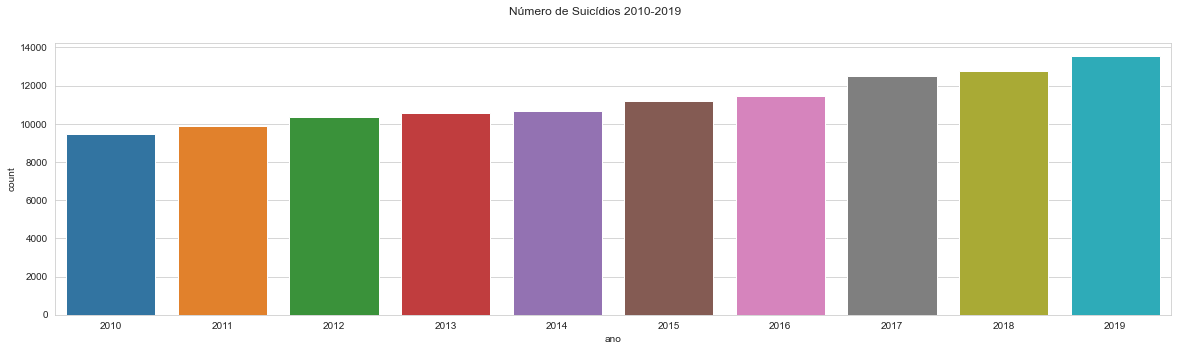

In [107]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
sns.countplot(x='ano', data=df)
plt.suptitle('Número de Suicídios 2010-2019')


O gráfico que mostra uma subida gradativa no número de suicídios de 2010 a 2019, mas com uma inclinação não muito acentuada, é uma indicação importante do aumento do número de suicídios em um período de dez anos. Embora o aumento possa não parecer tão dramático em comparação com a atenção crescente que o suicídio recebe atualmente, é importante notar que o aumento constante do número de suicídios é motivo de preocupação. O gráfico pode ter várias implicações, incluindo a necessidade de aumentar a conscientização sobre os fatores de risco do suicídio e desenvolver intervenções preventivas mais eficazes. No entanto, é importante lembrar que o número de casos de suicídio pode ser subestimado devido a subnotificação ou falta de registro adequado em algumas regiões. Por isso, é importante considerar que os dados podem ser imprecisos ou incompletos, e que o verdadeiro número de casos de suicídio pode ser ainda maior do que o que está sendo mostrado no gráfico. Em geral, o gráfico ressalta a importância contínua de prestar atenção ao problema do suicídio e de trabalhar para identificar e prevenir fatores de risco, especialmente em grupos populacionais vulneráveis.

Text(0.5, 0.98, 'Número de Suicídios por Sexo')

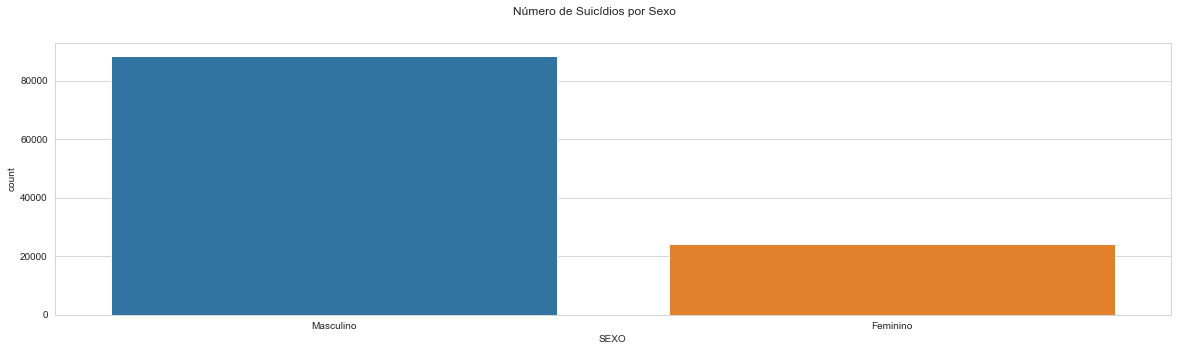

In [108]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
sns.countplot(x='SEXO', data=df)
plt.suptitle('Número de Suicídios por Sexo')

O gráfico mostra que pessoas do sexo masculino cometem mais do que o triplo de suicídios em comparação com pessoas do sexo feminino é uma indicação importante da diferença de gênero nos casos de suicídio. Essa disparidade pode ter várias implicações, incluindo a necessidade de identificar os fatores de risco específicos que afetam homens e mulheres de maneira diferente.

Uma possível explicação para a diferença no número de suicídios entre homens e mulheres pode ser atribuída às diferenças culturais e de gênero na forma como homens e mulheres lidam com a saúde mental. Homens são geralmente menos propensos a procurar ajuda profissional para problemas de saúde mental, e muitas vezes são socializados a lidar com o estresse e a pressão emocional de forma mais agressiva ou reprimida, o que pode aumentar o risco de suicídio.

O gráfico também destaca a necessidade de desenvolver intervenções específicas que abordem as necessidades e vulnerabilidades de homens e mulheres em relação ao suicídio. Por exemplo, campanhas de conscientização e prevenção voltadas especificamente para homens podem ser eficazes na redução do número de casos de suicídio entre esse grupo populacional.

No entanto, é importante lembrar que o gênero não é o único fator a ser considerado na análise de casos de suicídio. Outros fatores, como idade, estado civil, histórico de saúde mental e outros fatores socioeconômicos, também podem desempenhar um papel importante. Portanto, é importante analisar os dados de suicídio de maneira abrangente, considerando uma variedade de fatores que possam estar contribuindo para a ocorrência de casos.





Text(0.5, 0.98, 'Número de Suicídios por Raça')

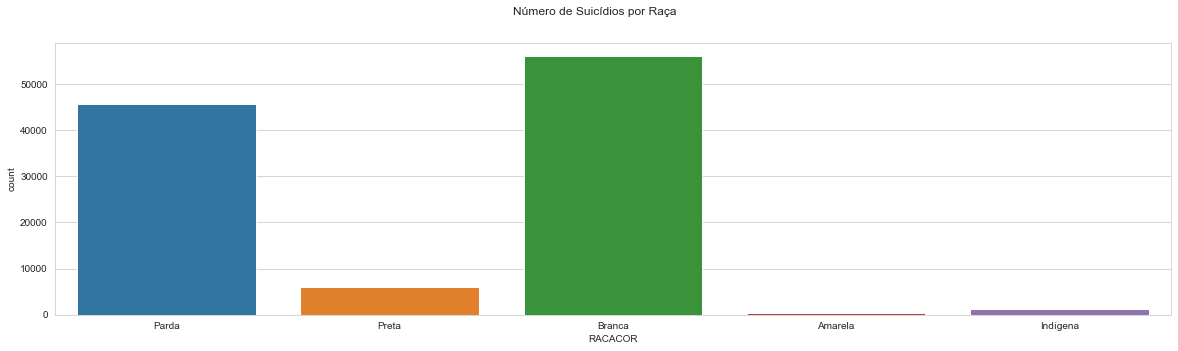

In [110]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
sns.countplot(x='RACACOR', data=df)
plt.suptitle('Número de Suicídios por Raça')

O gráfico mostra que pessoas brancas e pardas são a maioria nos casos de suicídio, com outras raças estando bem abaixo, isso é uma indicação importante da disparidade racial nos casos de suicídio. Essa disparidade pode ter várias implicações, incluindo a necessidade de identificar e abordar os fatores de risco específicos que afetam as diferentes raças de maneiras distintas.

Uma possível explicação para a diferença no número de suicídios entre pessoas brancas e pardas em comparação com outras raças pode ser atribuída a uma variedade de fatores socioeconômicos e culturais, como acesso limitado a cuidados de saúde mental, maior estigma associado à busca por ajuda para problemas de saúde mental e maior exposição a estressores sociais e psicológicos

Text(0.5, 0.98, 'Pessoas que cometeram suicídio, receberam assistência médica?')

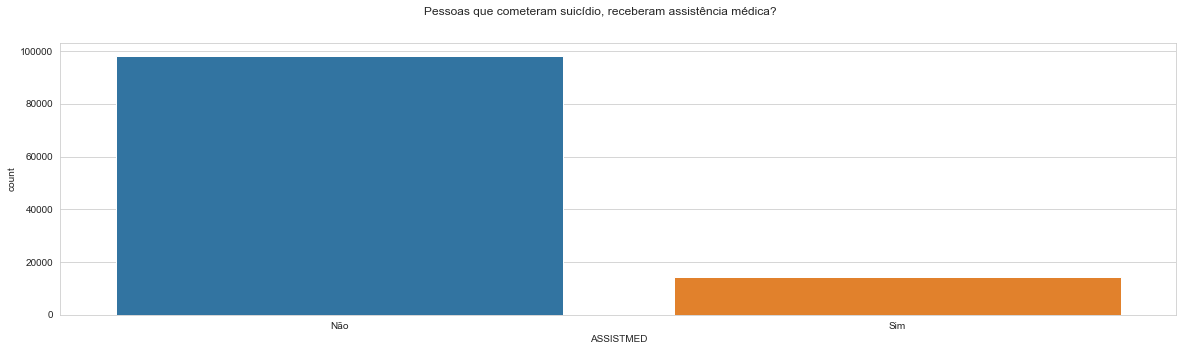

In [111]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
sns.countplot(x='ASSISTMED', data=df)
plt.suptitle('Pessoas que cometeram suicídio, receberam assistência médica?')

O gráfico mostra que a maioria das pessoas que cometeram suicídio não receberam assistência médica, isso é uma indicação preocupante da falta de acesso a cuidados de saúde mental e da necessidade de abordar as barreiras que impedem as pessoas de receberem ajuda.

Uma possível explicação para a falta de assistência médica pode ser atribuída a uma variedade de fatores, incluindo estigma associado à busca por ajuda para problemas de saúde mental, falta de acesso a profissionais de saúde mental treinados e capacidade financeira limitada para pagar pelo tratamento. Esses fatores podem levar as pessoas a não procurarem ajuda ou a não terem acesso à assistência adequada.

O gráfico destaca a necessidade de aumentar o acesso a serviços de saúde mental e de reduzir o estigma associado à busca por ajuda. Isso pode ser alcançado através do aumento do financiamento para serviços de saúde mental, do aumento do treinamento para profissionais de saúde mental e da conscientização pública sobre a importância do cuidado com a saúde mental.

Text(0.5, 0.98, 'Número de Suicídios por Estado Civil')

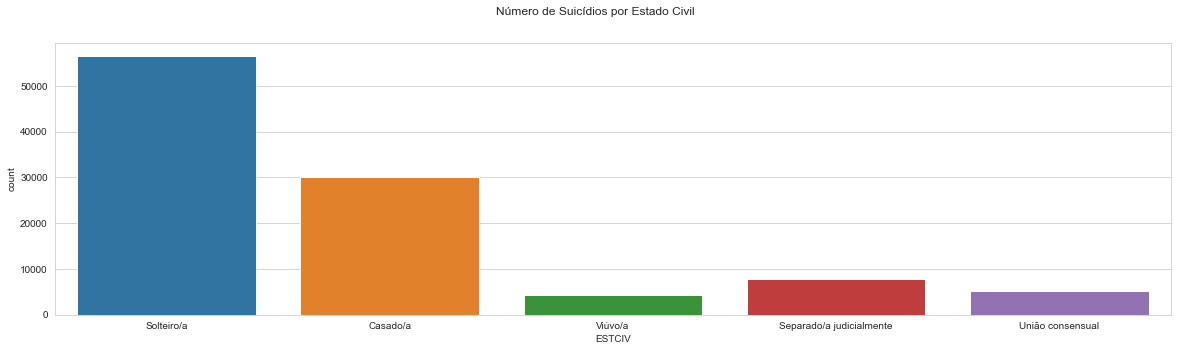

In [112]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
sns.countplot(x='ESTCIV', data=df)
plt.suptitle('Número de Suicídios por Estado Civil')

O gráfico que mostra que a maioria dos suicídios foram cometidos por pessoas solteiras, seguidos por pessoas casadas, é uma indicação interessante do possível impacto do estado civil na saúde mental.

Embora o gráfico sugira que o estado civil pode ser um fator que contribui para o suicídio, é importante lembrar que existem muitos outros fatores que podem contribuir para a saúde mental e o bem-estar das pessoas. Por exemplo, pessoas solteiras podem estar enfrentando solidão, isolamento social, dificuldade em estabelecer relacionamentos significativos e falta de apoio emocional.

Pessoas casadas, por outro lado, podem enfrentar estresse e conflitos conjugais, bem como responsabilidades familiares adicionais que podem afetar sua saúde mental. No entanto, o gráfico sugere que o estado civil pode ser um fator importante a ser considerado quando se trata de saúde mental e suicídio.

A análise do gráfico sugere que é importante que as pessoas solteiras recebam apoio emocional e social adequado, além de ajuda para estabelecer relacionamentos significativos. Para as pessoas casadas, pode ser importante abordar as questões de relacionamento e oferecer suporte para aliviar o estresse e os conflitos.

Text(0.5, 0.98, 'Número de Suicídios por Escolaridade (em anos)')

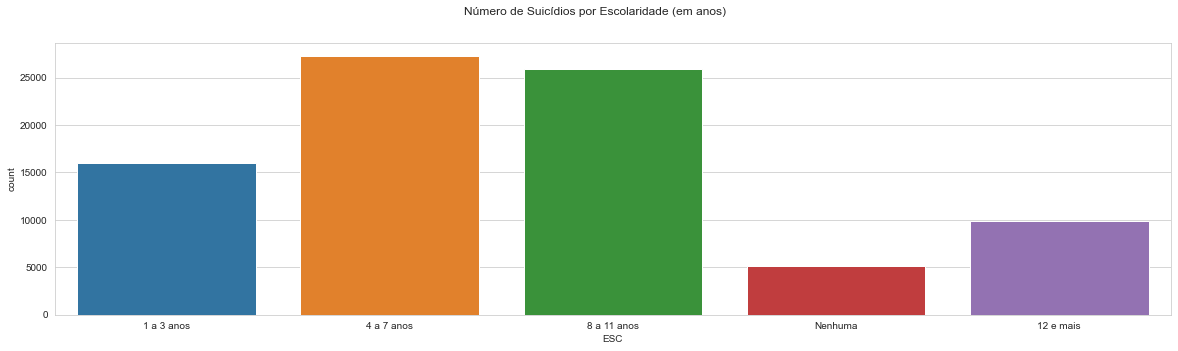

In [113]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
sns.countplot(x='ESC', data=df)
plt.suptitle('Número de Suicídios por Escolaridade (em anos)')

O gráfico mostra a relação entre escolaridade e suicídio é uma indicação importante da relação entre o nível de educação e a saúde mental. O fato de a maioria dos suicídios serem cometidos por pessoas com escolaridade de 4 a 7 anos, seguidos por pessoas com 8 a 11 anos de escolaridade, sugere que a falta de educação pode ser um fator de risco para o suicídio.

Existem muitos fatores que podem contribuir para essa relação. Por exemplo, pessoas com menor nível de educação podem ter menos acesso a recursos de saúde mental, como terapias e medicamentos. Além disso, a falta de educação pode afetar a empregabilidade, renda e qualidade de vida, o que pode aumentar o estresse e a ansiedade.

Por outro lado, o fato de que pessoas com 12 ou mais anos de escolaridade cometem muito menos suicídio sugere que a educação pode desempenhar um papel protetor na saúde mental. As pessoas com níveis mais elevados de educação podem ter maior acesso a recursos de saúde mental e podem estar mais equipadas para gerenciar o estresse e lidar com os desafios da vida.

Text(0.5, 0.98, 'Número de Óbitos por Suicídio por Local')

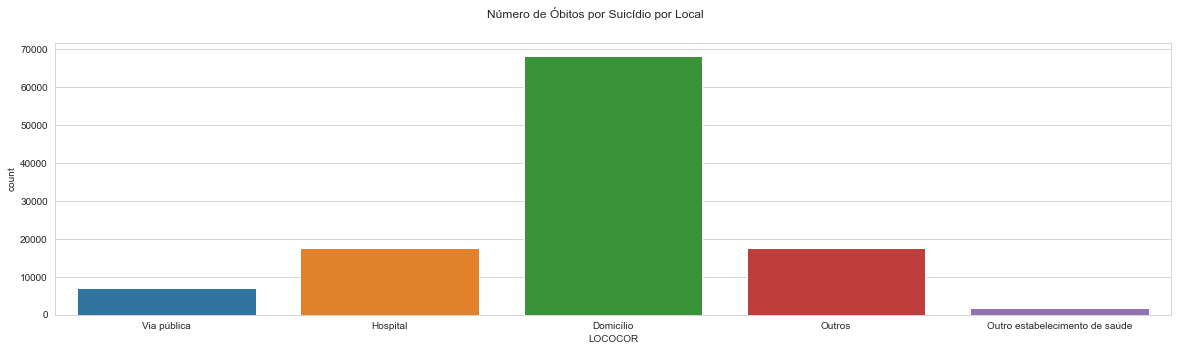

In [114]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
sns.countplot(x='LOCOCOR', data=df)
plt.suptitle('Número de Óbitos por Suicídio por Local')

O gráfico que mostra que a grande maioria dos óbitos por suicídio aconteceram a domicílio é uma indicação importante da forma como o suicídio ocorre. Esse resultado pode ser explicado pelo fato de que a pessoa que está pensando em cometer suicídio pode estar procurando um local em que se sinta mais confortável e seguro para fazer isso.

O ambiente doméstico pode ser um lugar onde a pessoa se sinta mais segura e confortável para tomar essa decisão, já que é um lugar familiar e de sua propriedade. Além disso, muitas vezes as pessoas podem preferir morrer em casa para evitar o constrangimento de morrer em um local público, ou ainda para evitar que outras pessoas vejam o seu sofrimento.

No entanto, o fato de que a maioria dos óbitos por suicídio aconteceram a domicílio também sugere que há uma necessidade de maior conscientização e apoio para as pessoas que estão sofrendo de problemas de saúde mental em suas próprias casas. Isso pode incluir a criação de programas de apoio psicológico domiciliar, que possam ajudar a identificar e tratar problemas de saúde mental em um ambiente mais confortável e seguro para o paciente.

Text(0.5, 0.98, 'Número de Óbitos por Suicídio por Idade')

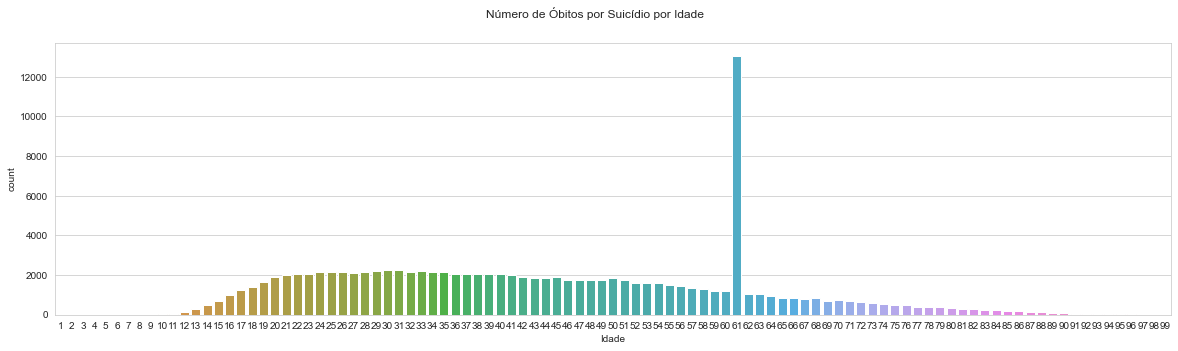

In [115]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
sns.countplot(x='Idade', data=df)
plt.suptitle('Número de Óbitos por Suicídio por Idade')

O gráfico mostra que as pessoas de 61 anos se distanciam significativamente da distribuição geral dos dados, isso pode indicar que existe uma diferença significativa nas taxas de suicídio nessa faixa etária em comparação com outras.

Isso pode ser devido a uma série de fatores, incluindo problemas de saúde mental relacionados à idade, como depressão ou ansiedade, além de questões relacionadas ao envelhecimento, como problemas de saúde crônicos, isolamento social e solidão. Além disso, as pessoas mais velhas também podem ter mais dificuldade em lidar com eventos estressantes, como a perda de um cônjuge ou a aposentadoria.

No entanto, é importante lembrar que uma amostra representativa é necessária para análises precisas e conclusivas, e que o tamanho da amostra também pode afetar a aparência do gráfico. É possível que o gráfico em questão possa ter sido influenciado por um erro na coleta de dados ou por uma amostra não representativa.

Portanto, é importante considerar todas as possíveis explicações e avaliar cuidadosamente a qualidade dos dados antes de chegar a qualquer conclusão sobre as taxas de suicídio em uma determinada faixa etária.

Text(0.5, 0.98, 'Número de Suicídios por Ocupação')

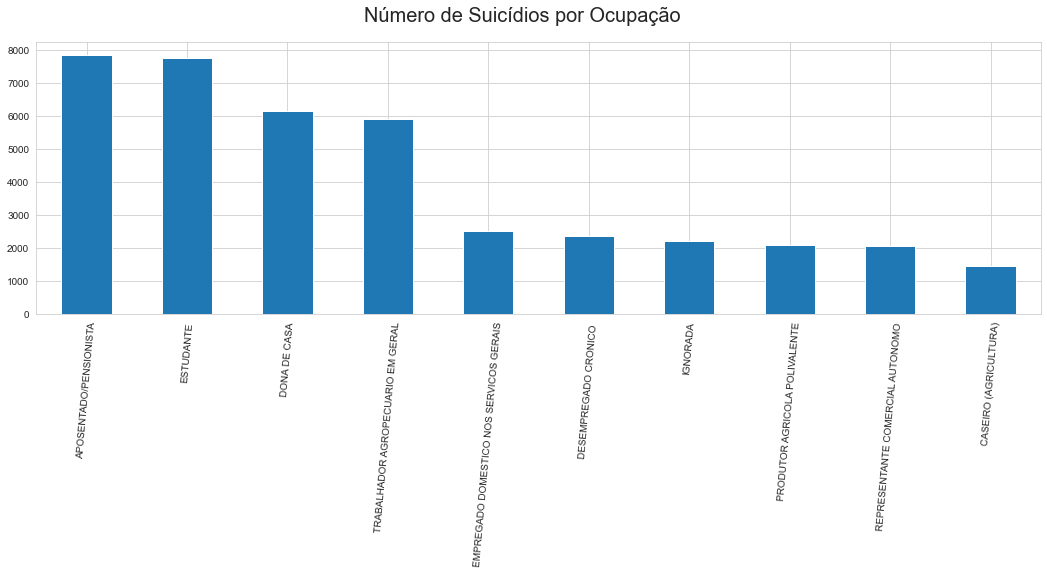

In [117]:
plt.figure(figsize=(18,5))
df['OCUP'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=85)
plt.suptitle('Número de Suicídios por Ocupação',fontsize=20)

Um gráfico que mostra que aposentados, estudantes, donas de casa e trabalhadores agropecuários têm as maiores taxas de suicídio pode indicar uma correlação entre essas profissões e um maior risco de problemas de saúde mental e suicídio.

Aposentados podem enfrentar problemas de isolamento social, falta de propósito e solidão, enquanto estudantes podem enfrentar altos níveis de estresse acadêmico e ansiedade em relação ao futuro. Donas de casa podem enfrentar sobrecarga de responsabilidades domésticas, enquanto trabalhadores agropecuários podem lidar com condições de trabalho difíceis e isolamento social.

No entanto, é importante lembrar que a correlação não implica causalidade, e pode haver outros fatores que afetam a relação entre essas profissões e o risco de suicídio.

Text(0.5, 0.98, 'Número de Suicídios por Cidade')

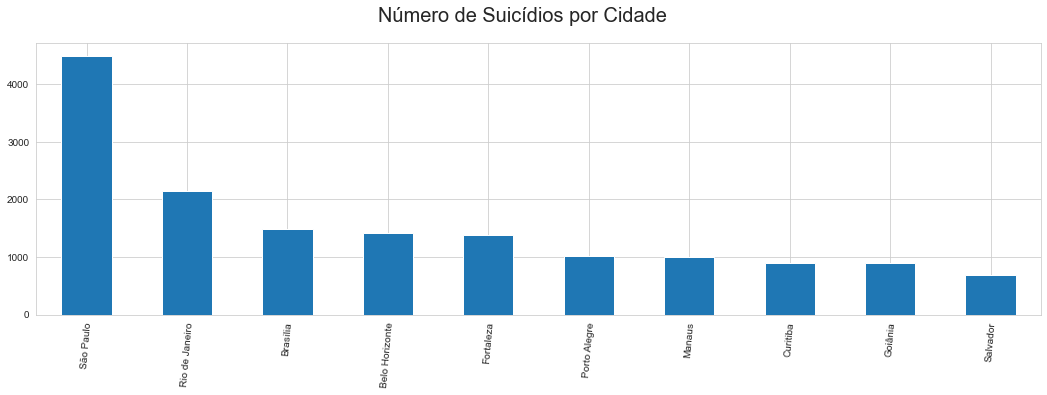

In [118]:
plt.figure(figsize=(18,5))
df['CODMUNRES'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=85)
plt.suptitle('Número de Suicídios por Cidade',fontsize=20)

O gráfico mostra que a cidade de São Paulo tem um número significativamente maior de casos de suicídio do que qualquer outra cidade, incluindo a segunda colocada, Rio de Janeiro, pode ter várias explicações.

Em primeiro lugar, São Paulo é a cidade mais populosa do Brasil e, portanto, é esperado que ela tenha um número maior de casos de suicídio em comparação com outras cidades. Além disso, São Paulo é um centro financeiro e comercial do país, o que pode contribuir para altos níveis de estresse e problemas de saúde mental entre a população.

No entanto, é importante lembrar que a quantidade de dados disponíveis e a qualidade da coleta de dados também podem influenciar o resultado do gráfico. Por exemplo, a cidade de São Paulo pode ter um sistema de notificação e registro de casos de suicídio mais eficiente do que outras cidades, o que pode levar a uma maior detecção e documentação desses casos.

Portanto, é importante considerar todos os fatores envolvidos na coleta e interpretação dos dados antes de tirar conclusões definitivas sobre as taxas de suicídio em uma determinada cidade.





Text(0.5, 0.98, 'Causa da morte')

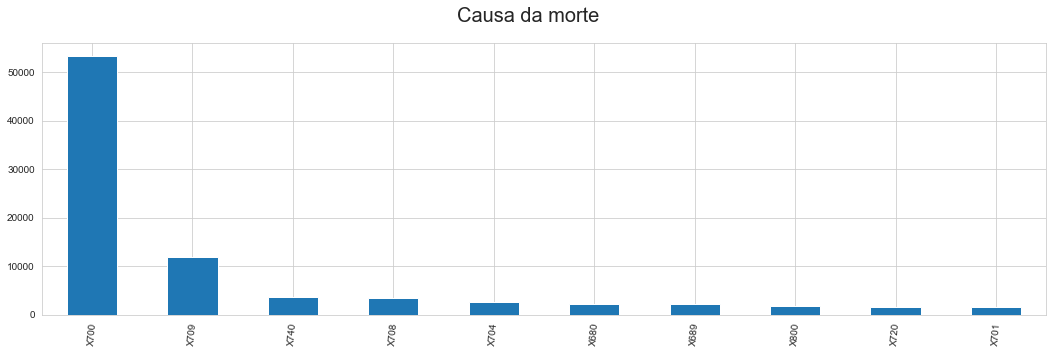

In [119]:
plt.figure(figsize=(18,5))
df['CAUSABAS'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=85)
plt.suptitle('Causa da morte',fontsize=20)

Um gráfico que mostra que a maior causa de morte por suicídio é o enforcamento, bem acima de todas as outras causas, pode indicar que essa é uma forma mais acessível e fácil para as pessoas cometerem suicídio. O enforcamento é uma forma violenta e altamente letal de suicídio e, portanto, pode levar a uma morte rápida em comparação com outras formas.

Outra possível explicação é que o enforcamento é uma forma mais comum de suicídio em determinadas culturas ou regiões geográficas. Além disso, pessoas que têm maior probabilidade de cometer suicídio, como aquelas com transtornos mentais, podem ter uma preferência maior por esse método.

Independentemente da razão, os dados apresentados pelo gráfico sugerem que é importante prestar mais atenção e oferecer mais recursos para prevenir o suicídio por enforcamento. A conscientização pública sobre os sinais de alerta de suicídio e a disponibilidade de ajuda profissional pode ser uma estratégia importante para reduzir o número de suicídios em geral e, em particular, aqueles cometidos por enforcamento.

## Tratamento de Dados Faltantes

Primeiro vamos anaslisar a porcentagem de dados faltantes em cada uma das colunas, e após isso, tratar aqueles que forem possíveis.

In [60]:
for col in df.columns:
    print(f'A porcentagem de valores faltantes na coluna {col} é de: {(df[col].isna().sum()/len(df) * 100):.2f}%')

A porcentagem de valores faltantes na coluna estado é de: 0.00%
A porcentagem de valores faltantes na coluna ano é de: 0.00%
A porcentagem de valores faltantes na coluna mes é de: 0.00%
A porcentagem de valores faltantes na coluna DTOBITO é de: 0.00%
A porcentagem de valores faltantes na coluna DTNASC é de: 0.00%
A porcentagem de valores faltantes na coluna SEXO é de: 0.02%
A porcentagem de valores faltantes na coluna RACACOR é de: 2.82%
A porcentagem de valores faltantes na coluna ASSISTMED é de: 37.16%
A porcentagem de valores faltantes na coluna ESCMAE é de: 99.99%
A porcentagem de valores faltantes na coluna ESTCIV é de: 7.73%
A porcentagem de valores faltantes na coluna ESC é de: 25.04%
A porcentagem de valores faltantes na coluna OCUP é de: 46.42%
A porcentagem de valores faltantes na coluna CODMUNRES é de: 0.00%
A porcentagem de valores faltantes na coluna CAUSABAS é de: 0.00%
A porcentagem de valores faltantes na coluna CAUSABAS_O é de: 0.26%
A porcentagem de valores faltantes 

In [61]:
df['ASSISTMED'].value_counts()

Não    56318
Sim    14369
Name: ASSISTMED, dtype: int64

In [62]:
df['ASSISTMED'].fillna('Não', inplace=True)
df['ASSISTMED'].value_counts()

Não    98122
Sim    14369
Name: ASSISTMED, dtype: int64

In [63]:
df['ESC'].isna().sum()

28164

In [64]:
df['ESC'].value_counts()

4 a 7 anos     27278
8 a 11 anos    25947
1 a 3 anos     15992
12 e mais       9915
Nenhuma         5195
Name: ESC, dtype: int64

Vamos distribuir os dados de forma igual, para cada valor na coluna 'ESC'

In [65]:
print(f'A porcentagem de "4 a 7 anos" é: {(27278 / len(df["ESC"]) * 100):.2f}%')
print(f'A porcentagem de "8 a 11 anos" é: {(25947 / len(df["ESC"]) * 100):.2f}%')
print(f'A porcentagem de "1 a 3 anos" é: {(15992 / len(df["ESC"]) * 100):.2f}%')
print(f'A porcentagem de "12 e mais" é: {(9915 / len(df["ESC"]) * 100):.2f}%')
print(f'A porcentagem de "Nenhuma" é: {(5195 / len(df["ESC"]) * 100):.2f}%')

A porcentagem de "4 a 7 anos" é: 24.25%
A porcentagem de "8 a 11 anos" é: 23.07%
A porcentagem de "1 a 3 anos" é: 14.22%
A porcentagem de "12 e mais" é: 8.81%
A porcentagem de "Nenhuma" é: 4.62%


In [66]:
print(f'"4 a 7 anos" vai receber {round((24 / 100) * 28164)} valores')
print(f'"8 a 11 anos" vai receber {round((23 / 100) * 28164)} valores')
print(f'"1 a 3 anos" vai receber {round((14 / 100) * 28164)} valores')
print(f'"12 e mais" vai receber {round((8 / 100) * 28164)} valores')
print(f'"Nenhuma" vai receber {round((4 / 100) * 28164)} valores')

"4 a 7 anos" vai receber 6759 valores
"8 a 11 anos" vai receber 6478 valores
"1 a 3 anos" vai receber 3943 valores
"12 e mais" vai receber 2253 valores
"Nenhuma" vai receber 1127 valores


In [67]:
df4_7 = df.loc[df['ESC'].isna()][:8283]
df4_7['ESC'].fillna('4 a 7 anos', inplace=True)

df8_11 = df.loc[df['ESC'].isna()][:7998]
df8_11['ESC'].fillna('8 a 11 anos', inplace=True)

df1_3 = df.loc[df['ESC'].isna()][:5463]
df1_3['ESC'].fillna('1 a 3 anos', inplace=True)

df12 = df.loc[df['ESC'].isna()][:3773]
df12['ESC'].fillna('12 e mais', inplace=True)

df0 = df.loc[df['ESC'].isna()][:2647]
df0['ESC'].fillna('Nenhuma', inplace=True)

In [68]:
prov_df = df.dropna(subset='ESC')
novo_df = pd.concat([prov_df, df4_7, df8_11, df1_3, df12, df0])
novo_df

,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESCMAE,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,CIRURGIA,Idade
1,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,Não,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,Não,11
2,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,Não,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não,25
3,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,Não,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não,15
4,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,Não,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,Não,27
6,AC,2010,4,2010-04-30,1967-07-13,Feminino,Preta,Não,NaN,Solteiro/a,4 a 7 anos,DONA DE CASA,Tarauacá,X780,X780,Hospital,Não,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7715,SP,2010,5,2010-05-26,0,Feminino,Branca,Não,NaN,Casado/a,Nenhuma,NaN,Itápolis,X700,X700,Hospital,Não,220
7717,SP,2010,4,2010-04-29,1975-07-12,Masculino,Parda,Não,NaN,Solteiro/a,Nenhuma,PESCADOR ARTESANAL DE AGUA DOCE,Praia Grande,X708,X708,Outros,Não,35
7725,SP,2010,1,2010-01-15,0,Masculino,Preta,Não,NaN,NaN,Nenhuma,IGNORADA,350000,X704,X704,Via pública,Não,220
7732,SP,2010,4,2010-04-04,1975-12-03,Masculino,Branca,Não,NaN,Casado/a,Nenhuma,NaN,Santos,X700,X700,Domicílio,NaN,35


In [69]:
novo_df['ESC'].isna().sum()

0

In [70]:
novo_df['SEXO'].fillna('Masculino', inplace=True)
novo_df['RACACOR'].fillna('Branca', inplace=True)
novo_df['ESTCIV'].fillna('Solteiro/a', inplace=True)
novo_df['OCUP'].fillna('', inplace=True)
novo_df['LOCOCOR'].fillna('', inplace=True)
novo_df['Idade'].fillna(novo_df['Idade'].mean(), inplace=True)

In [71]:
for col in df.columns:
    print(f'A porcentagem de valores faltantes na coluna {col} é de: {(novo_df[col].isna().sum()/len(df) * 100):.2f}%')

A porcentagem de valores faltantes na coluna estado é de: 0.00%
A porcentagem de valores faltantes na coluna ano é de: 0.00%
A porcentagem de valores faltantes na coluna mes é de: 0.00%
A porcentagem de valores faltantes na coluna DTOBITO é de: 0.00%
A porcentagem de valores faltantes na coluna DTNASC é de: 0.00%
A porcentagem de valores faltantes na coluna SEXO é de: 0.00%
A porcentagem de valores faltantes na coluna RACACOR é de: 0.00%
A porcentagem de valores faltantes na coluna ASSISTMED é de: 0.00%
A porcentagem de valores faltantes na coluna ESCMAE é de: 99.97%
A porcentagem de valores faltantes na coluna ESTCIV é de: 0.00%
A porcentagem de valores faltantes na coluna ESC é de: 0.00%
A porcentagem de valores faltantes na coluna OCUP é de: 0.00%
A porcentagem de valores faltantes na coluna CODMUNRES é de: 0.00%
A porcentagem de valores faltantes na coluna CAUSABAS é de: 0.00%
A porcentagem de valores faltantes na coluna CAUSABAS_O é de: 0.35%
A porcentagem de valores faltantes na 

In [72]:
novo_df.drop(['DTOBITO', 'DTNASC'], axis=1, inplace=True)

## Pré-Processamento de Dados

Vamos transformar os dados categóricos em números, para podermos utiliza-los em nosso modelo de clusterização, utilizando a função LabelEncoder()

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
encolder = LabelEncoder()

for coluna in novo_df.drop(['ano','mes', 'Idade'], axis=1).columns:
    novo_df[coluna] = encolder.fit_transform(novo_df[coluna])

In [75]:
novo_df.head()

,estado,ano,mes,SEXO,RACACOR,ASSISTMED,ESCMAE,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,CIRURGIA,Idade
1,0,2010,1,1,3,0,4,2,0,296,4579,245,411,5,0,11
2,0,2010,2,1,3,0,4,2,0,296,4579,245,411,2,0,25
3,0,2010,2,1,3,0,4,2,0,296,4579,245,411,2,0,15
4,0,2010,4,0,3,0,4,0,0,240,4579,245,411,1,0,27
6,0,2010,4,0,4,0,4,2,2,240,4579,245,411,2,0,43


## Modelo de Clusterização
O modelo de clusterização K-means é uma das técnicas mais populares para analisar dados não rotulados e identificar padrões nos dados. Ao aplicar o modelo K-means nos dados de suicídio, é possível agrupar as observações em clusters, com base em características compartilhadas.

Existem diversas variáveis que podem ser consideradas na clusterização de dados de suicídio, como idade, gênero, escolaridade, ocupação, entre outras. A utilização do modelo K-means pode ajudar a identificar grupos de indivíduos com características semelhantes que possam estar em maior risco de cometer suicídio ou que possam se beneficiar de intervenções preventivas específicas.

Além disso, o modelo K-means pode ajudar a identificar padrões de comportamento em relação ao suicídio em diferentes grupos populacionais, tais como diferenças geográficas, entre outras. Essa análise pode contribuir para o desenvolvimento de políticas públicas mais efetivas e ações preventivas direcionadas para grupos específicos.

Dessa forma, a utilização do modelo K-means na clusterização de dados de suicídio pode fornecer insights valiosos para entender as causas e fatores de risco associados ao suicídio, ajudando a orientar ações preventivas e intervenções que possam salvar vidas.

In [76]:
from sklearn.cluster import KMeans

In [77]:
X = novo_df.values

In [78]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

A escolha do número de clusters é um passo importante na aplicação do algoritmo K-means para a clusterização de dados de suicídios. O método do cotovelo é uma técnica comumente utilizada para ajudar a determinar o número ideal de clusters para o modelo. Esse método envolve plotar o número de clusters em relação à soma das distâncias quadradas intra-cluster. A ideia é identificar o ponto em que a adição de mais clusters não melhora significativamente a precisão do modelo, ou seja, o ponto em que a curva começa a se achatar como um cotovelo.

A escolha adequada do número de clusters é crucial para garantir que o modelo K-means esteja agrupando os dados de maneira eficiente e relevante para a análise de suicídios. Se o número de clusters for muito baixo, pode haver um agrupamento excessivamente amplo e impreciso, perdendo informações importantes sobre as características dos dados. Se o número de clusters for muito alto, o modelo pode se tornar superespecífico, criando agrupamentos que são muito semelhantes ou irrelevantes.

Portanto, a utilização do método do cotovelo pode ajudar a escolher o número ideal de clusters para o modelo K-means, garantindo que a clusterização seja eficiente e relevante para a análise dos dados de suicídios.

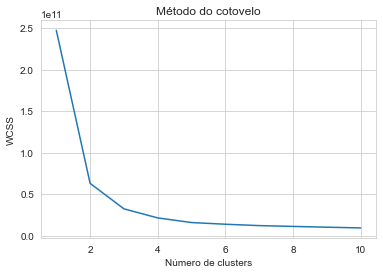

In [79]:
plt.plot(range(1, 11), wcss)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Pelo método do cotovelo podemos perceber que um bom número de cluster seria 3. Portanto o nosso modelo terá 3 cluster

In [82]:
modelo_definitivo = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
modelo_definitivo.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=0)

Agora vamos criar uma coluna com os clusters criados pelo nosso modelo.

In [121]:
cluster_map = pd.DataFrame(df, columns=df.columns)
cluster_map['Cluster'] = modelo_definitivo.labels_
cluster_map.head()

,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESCMAE,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,CIRURGIA,Idade,Cluster
1,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,Não,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,Não,11,2
2,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,Não,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não,25,2
3,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,Não,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não,15,2
4,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,Não,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,Não,27,2
5,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,Não,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio,Não,28,2


Agora vamos analisar os dados segregados pelos clusters.

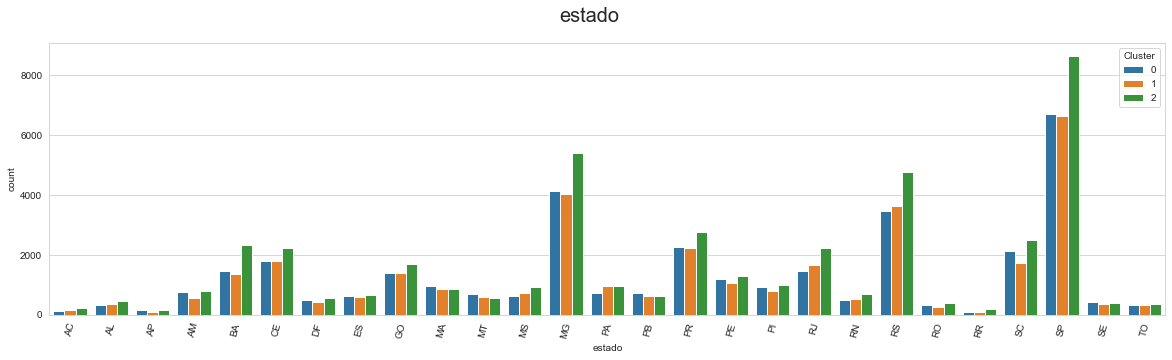

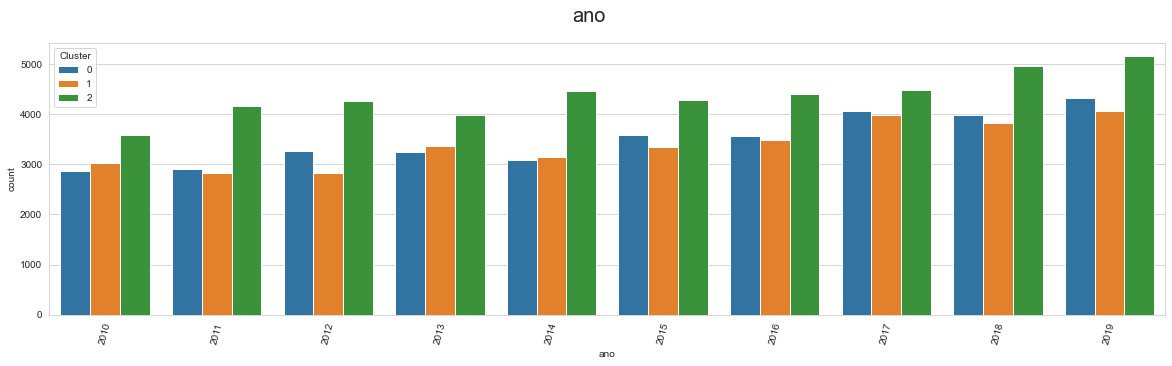

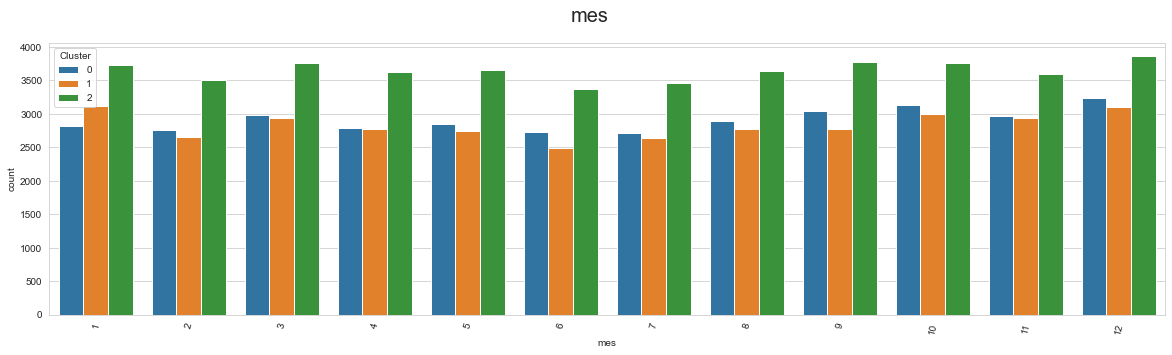

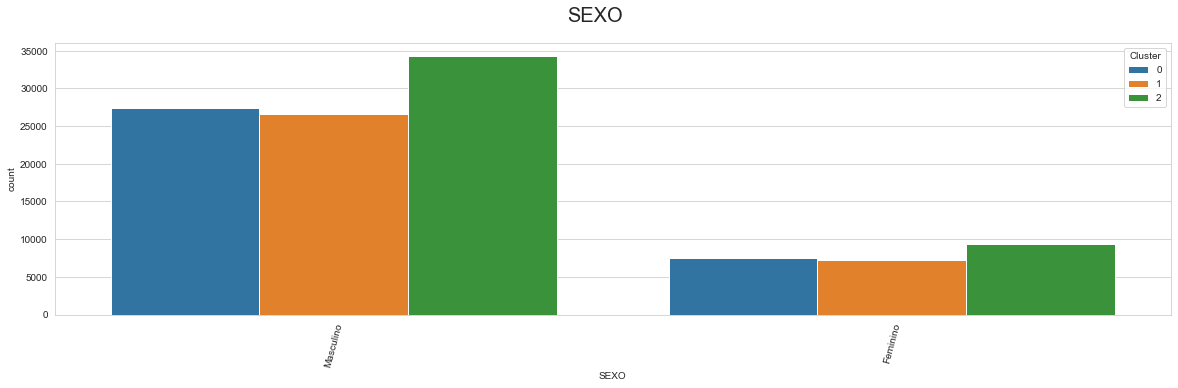

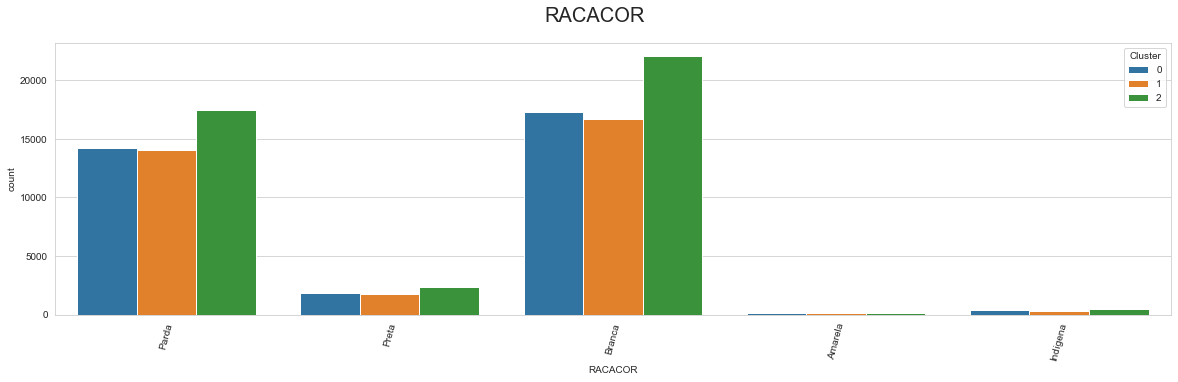

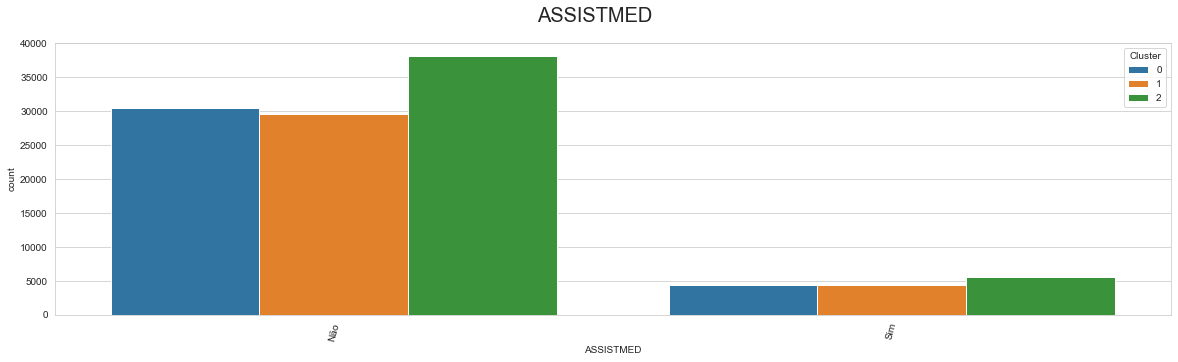

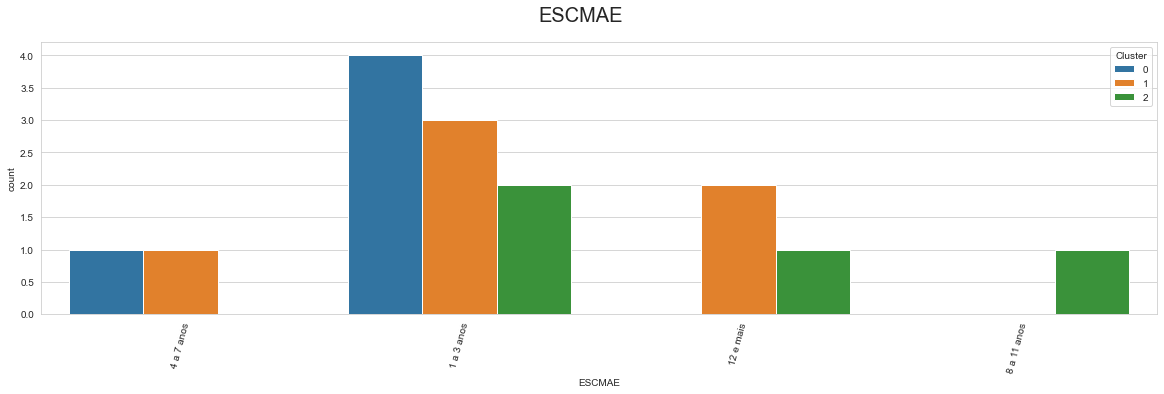

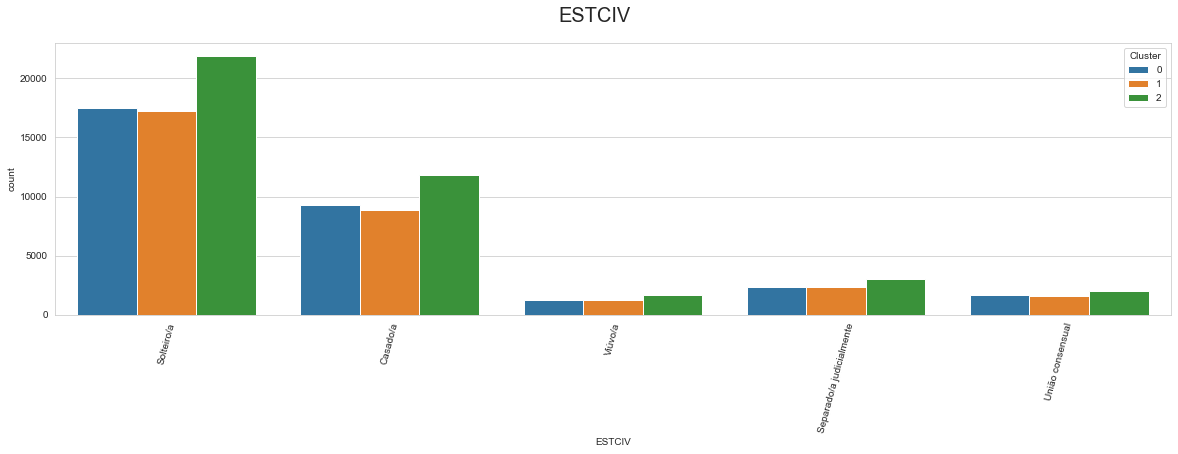

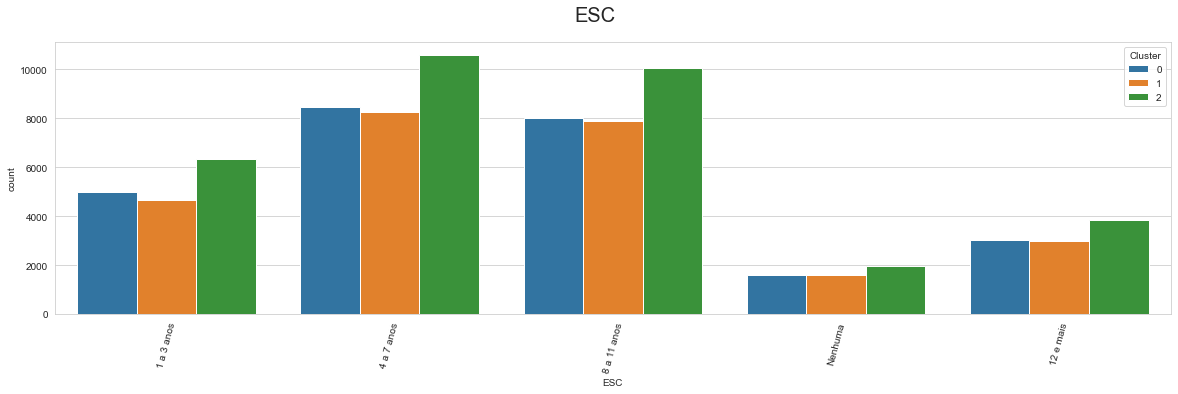

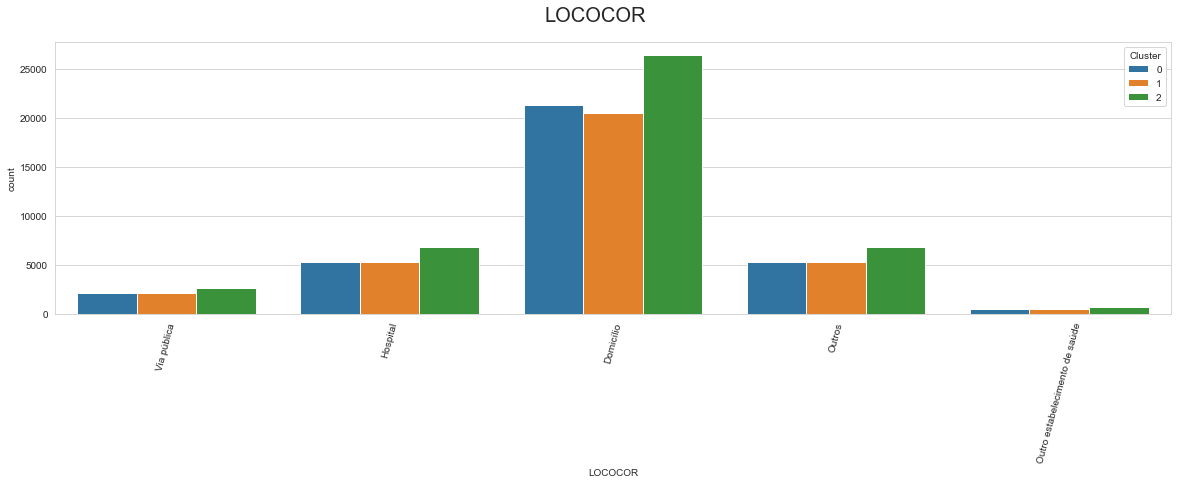

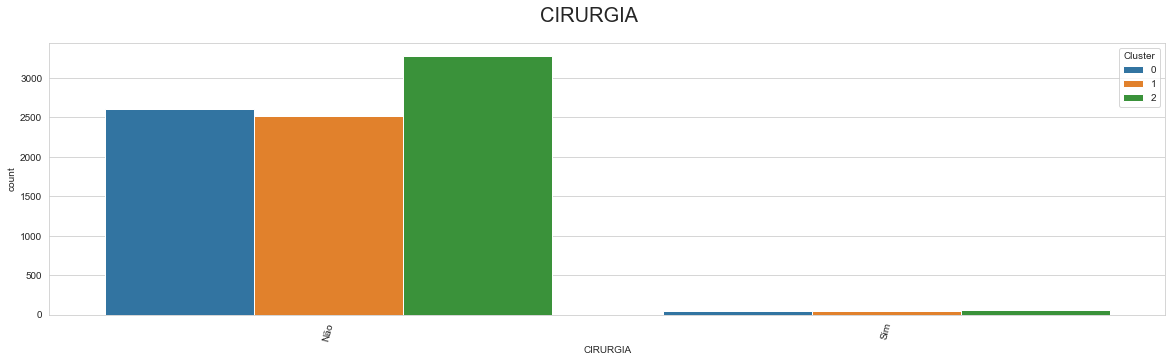

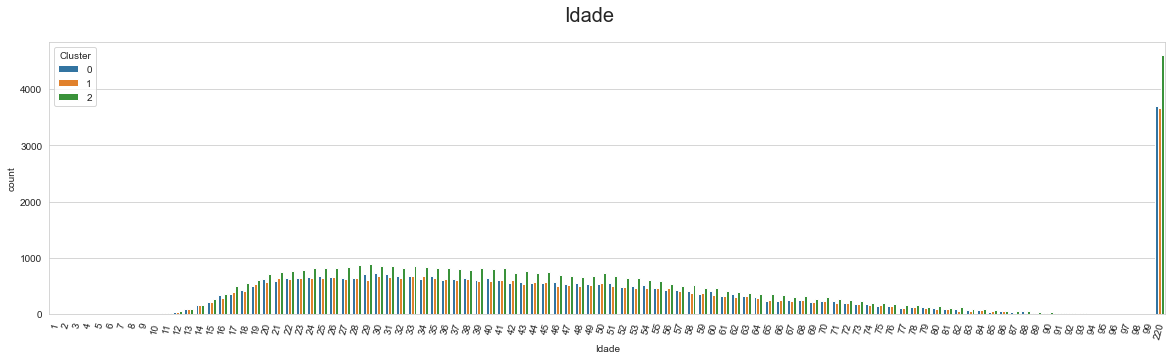

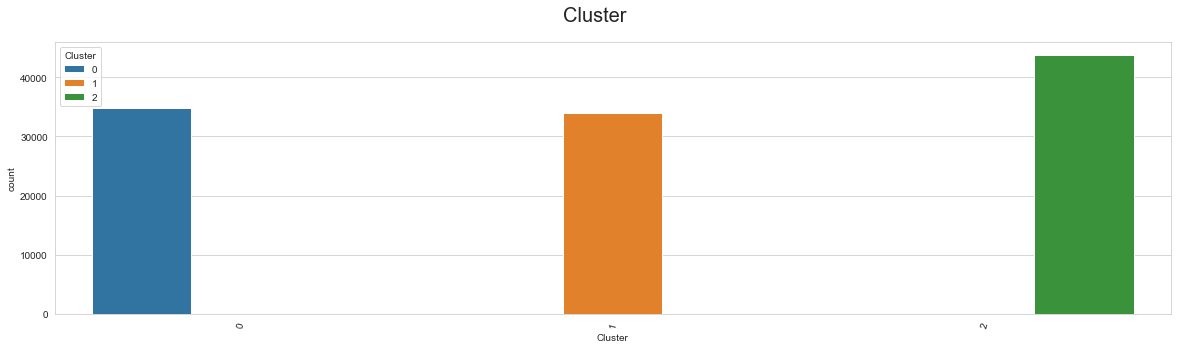

In [84]:
for col in df.columns:
        if col not in ['DTOBITO', 'DTNASC', 'OCUP', 'CODMUNRES', 'CAUSABAS', 'CAUSABAS_O']:
            f, axes = plt.subplots(1,1,figsize=(20,5))
            sns.set_style('whitegrid')
            sns.countplot(x=col, data = cluster_map, hue='Cluster')
            plt.suptitle(col,fontsize=20)
            plt.xticks(rotation=75)
            plt.show()

## Conclusão
Este projeto de análise e clusterização dos dados de suicídio foi capaz de fornecer insights valiosos sobre os padrões e tendências dos casos de suicídio. O modelo de kmeans dividiu os dados em três clusters, permitindo uma melhor compreensão das características que distinguem os casos de suicídio em diferentes níveis de risco.

O cluster número 2, que apresentou as mais altas taxas em variáveis correlacionadas com o grande número de suicídio, indica uma situação de alto risco e exige atenção especial das autoridades e organizações de saúde. Os outros clusters indicam riscos moderados e baixos, o que pode auxiliar na prevenção e na identificação precoce de casos de suicídio.

A análise dos dados também revelou a importância da assistência médica e da escolaridade na prevenção do suicídio. Pessoas solteiras, com menor nível de escolaridade e sem assistência médica foram identificadas como grupos de maior risco.

Os resultados obtidos neste projeto podem ser utilizados para orientar políticas públicas e ações de prevenção do suicídio. A identificação precoce de fatores de risco pode ser uma ferramenta poderosa para reduzir as taxas de suicídio em nossa sociedade. Portanto, este projeto demonstra a importância da ciência de dados na busca por soluções para problemas sociais complexos.